In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing   import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df = df.drop("User ID",axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


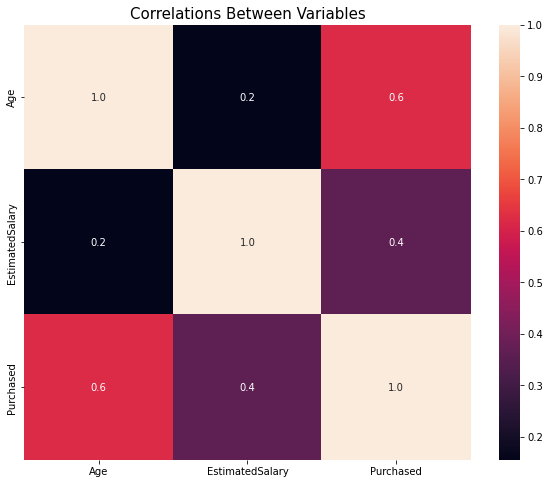

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, fmt= '.1f')
plt.title("Correlations Between Variables", size=15)
plt.show()

In [6]:
label = LabelEncoder()
df["Gender"] = label.fit_transform(df["Gender"])

In [7]:
y = df["EstimatedSalary"]
X = df.drop("EstimatedSalary", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


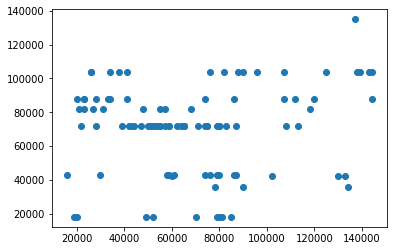

In [13]:
plt.scatter(y_test, y_pred)

(array([ 9.,  9.,  8., 21., 16.,  9., 17.,  6.,  2.,  3.]),
 array([-78000., -60400., -42800., -25200.,  -7600.,  10000.,  27600.,
         45200.,  62800.,  80400.,  98000.]),
 <a list of 10 Patch objects>)

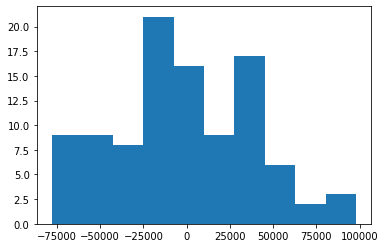

In [14]:
plt.hist(y_test - y_pred)

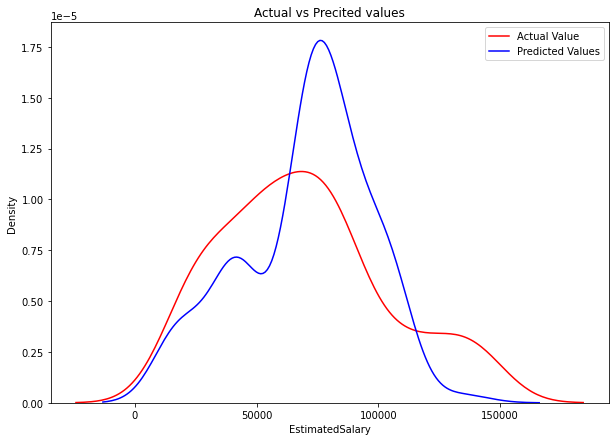

In [15]:
plt.figure(figsize=(10, 7))
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
plt.title('Actual vs Precited values')
plt.legend()
plt.show()